<a href="https://colab.research.google.com/github/turtlemana/Korean_YieldCurve_Pred/blob/main/Korean_Yield_Curve_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')
df10 = pd.read_csv('/content/gdrive/My Drive/Korean_10_Years.csv',encoding= 'utf-8') 
df10 #10year data

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,날짜,종가,오픈,고가,저가,변동 %
0,2021년 12월 31일,2.255,2.255,2.256,2.255,0.31%
1,2021년 12월 30일,2.248,2.242,2.248,2.233,3.12%
2,2021년 12월 29일,2.180,2.190,2.200,2.176,-0.73%
3,2021년 12월 28일,2.196,2.213,2.221,2.196,-0.72%
4,2021년 12월 27일,2.212,2.204,2.219,2.196,0.45%
...,...,...,...,...,...,...
3141,2012년 02월 06일,3.780,3.790,3.790,3.780,0.53%
3142,2012년 02월 03일,3.760,3.760,3.770,3.750,0.00%
3143,2012년 02월 02일,3.760,3.760,3.770,3.760,0.27%
3144,2012년 02월 01일,3.750,3.750,3.760,3.740,-0.27%


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD 
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# Loading the data

df5 = pd.read_csv('/content/gdrive/My Drive/Korean_5_Years.csv',encoding= 'utf-8') 
df1 = pd.read_csv('/content/gdrive/My Drive/Korean_1_Years.csv',encoding= 'utf-8') 
df3 = pd.read_csv('/content/gdrive/My Drive/Korean_3_Years.csv',encoding= 'utf-8') 
df2 = pd.read_csv('/content/gdrive/My Drive/Korean_2_Years.csv',encoding= 'utf-8') 
df4 = pd.read_csv('/content/gdrive/My Drive/Korean_4_Years.csv',encoding= 'utf-8') 
df20 = pd.read_csv('/content/gdrive/My Drive/Korean_20_Years.csv',encoding= 'utf-8') 
df30 = pd.read_csv('/content/gdrive/My Drive/Korean_30_Years.csv',encoding= 'utf-8') 


In [ ]:
#Pre-processing the data

data1=df1[['날짜','종가']]
data1['1year']=data1['종가']
data1=data1.drop(columns=['종가'],axis=1)
data2=df2[['날짜','종가']]
data2['2year']=data2['종가']
data2=data2.drop(columns=['종가'],axis=1)
data3=df3[['날짜','종가']]
data3['3year']=data3['종가']
data3=data3.drop(columns=['종가'],axis=1)
data4=df4[['날짜','종가']]
data4['4year']=data4['종가']
data4=data4.drop(columns=['종가'],axis=1)
data5=df5[['날짜','종가']]
data5['5year']=data5['종가']
data5=data5.drop(columns=['종가'],axis=1)
data6=df10[['날짜','종가']]
data6['10year']=data6['종가']
data6=data6.drop(columns=['종가'],axis=1)
data7=df20[['날짜','종가']]
data7['20year']=data7['종가']
data7=data7.drop(columns=['종가'],axis=1)
data8=df30[['날짜','종가']]
data8['30year']=data8['종가']
data8=data8.drop(columns=['종가'],axis=1)

In [ ]:
#Merging all the data 
merged=pd.merge(data1,data2)
for i in range(3,9):
  merged=pd.merge(merged,globals()[f'data{i}'])

merged

,날짜,1year,2year,3year,4year,5year,10year,20year,30year
0,2021년 12월 31일,1.351,1.672,1.795,1.925,2.005,2.255,2.334,2.315
1,2021년 12월 30일,1.351,1.672,1.802,1.925,2.018,2.248,2.322,2.304
2,2021년 12월 29일,1.351,1.676,1.783,1.890,1.974,2.180,2.289,2.265
3,2021년 12월 28일,1.341,1.682,1.786,1.910,1.989,2.196,2.283,2.263
4,2021년 12월 27일,1.336,1.671,1.776,1.897,1.990,2.212,2.284,2.260
...,...,...,...,...,...,...,...,...,...
2668,2012년 09월 19일,2.860,2.900,2.855,2.940,2.950,3.120,3.130,3.020
2669,2012년 09월 18일,2.800,2.875,2.860,2.955,2.940,3.090,3.100,2.970
2670,2012년 09월 17일,2.870,2.910,2.900,2.990,2.970,3.120,3.130,2.970
2671,2012년 09월 13일,2.770,2.880,2.800,2.950,2.910,3.070,3.080,2.980


In [ ]:
# Setting the date to become index of the dataframe

df=merged.loc[::-1].reset_index(drop=True)
df=df.set_index('날짜',drop=True)
df.head(10)


,1year,2year,3year,4year,5year,10year,20year,30year
날짜,,,,,,,,
2012년 09월 12일,2.77,2.815,2.770,2.870,2.865,3.04,3.07,3.010
2012년 09월 13일,2.77,2.880,2.800,2.950,2.910,3.07,3.08,2.980
2012년 09월 17일,2.87,2.910,2.900,2.990,2.970,3.12,3.13,2.970
2012년 09월 18일,2.80,2.875,2.860,2.955,2.940,3.09,3.10,2.970
2012년 09월 19일,2.86,2.900,2.855,2.940,2.950,3.12,3.13,3.020
2012년 09월 20일,2.84,2.840,2.880,2.970,2.920,3.07,3.08,2.990
2012년 09월 21일,2.93,2.850,2.835,2.900,2.900,3.06,3.08,3.020
2012년 09월 24일,2.88,2.830,2.820,2.900,2.890,3.04,3.08,3.016
2012년 09월 27일,2.85,2.840,2.795,2.900,2.880,3.05,3.08,3.026


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#1Y, 5Y, 30Y becomes Predict variable

return_period = 5
Y = df.loc[:, ['1year', '5year', '30year']].shift(-return_period)
Y.columns = [col+'_pred' for col in Y.columns]
Y.head()

,1year_pred,5year_pred,30year_pred
날짜,,,
2012년 09월 12일,2.84,2.920,2.990
2012년 09월 13일,2.93,2.900,3.020
2012년 09월 17일,2.88,2.890,3.016
2012년 09월 18일,2.85,2.880,3.026
2012년 09월 19일,2.83,2.855,2.985


In [ ]:
X = df.loc[:, ['1year', '2year', '3year', '4year', '5year', '10year', '20year', '30year']]

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.columns]
X = dataset.loc[:, X.columns]

In [ ]:
dataset

,1year_pred,5year_pred,30year_pred,1year,2year,3year,4year,5year,10year,20year,30year
날짜,,,,,,,,,,,
2012년 09월 12일,2.840,2.920,2.990,2.770,2.815,2.770,2.870,2.865,3.040,3.070,3.010
2012년 09월 20일,2.810,2.820,3.020,2.840,2.840,2.880,2.970,2.920,3.070,3.080,2.990
2012년 10월 02일,2.790,2.840,2.960,2.810,2.770,2.750,2.750,2.820,2.970,3.010,3.020
2012년 10월 12일,2.800,2.890,3.130,2.790,2.760,2.770,2.820,2.840,2.940,2.970,2.960
2012년 10월 23일,2.780,2.875,3.000,2.800,2.820,2.810,2.890,2.890,3.030,3.070,3.130
...,...,...,...,...,...,...,...,...,...,...,...
2021년 12월 04일,1.364,1.972,2.214,1.406,1.768,1.897,2.025,2.030,2.235,2.253,2.230
2021년 12월 09일,1.315,1.976,2.220,1.364,1.695,1.794,1.983,1.972,2.188,2.224,2.214
2021년 12월 14일,1.276,1.937,2.197,1.315,1.671,1.783,1.940,1.976,2.167,2.236,2.220


In [ ]:
dataset.shape

(534, 11)

In [ ]:
pd.set_option('precision', 3)
dataset.describe()

,1year_pred,5year_pred,30year_pred,1year,2year,3year,4year,5year,10year,20year,30year
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,1.593,1.973,2.332,1.596,1.727,1.779,1.927,1.974,2.229,2.313,2.333
std,0.625,0.597,0.682,0.627,0.600,0.593,0.601,0.598,0.618,0.652,0.683
min,0.558,1.042,1.171,0.558,0.710,0.799,0.930,1.042,1.184,1.179,1.171
25%,1.242,1.495,1.807,1.242,1.297,1.329,1.465,1.495,1.732,1.795,1.807
50%,1.552,1.875,2.227,1.554,1.679,1.731,1.857,1.875,2.156,2.235,2.227
75%,1.853,2.355,2.675,1.858,2.089,2.138,2.316,2.357,2.574,2.676,2.681
max,2.840,3.410,4.045,2.840,2.920,3.020,3.270,3.410,3.760,3.940,4.045


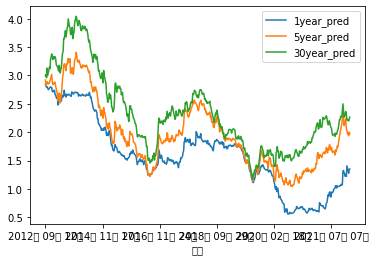

In [ ]:
Y.plot()

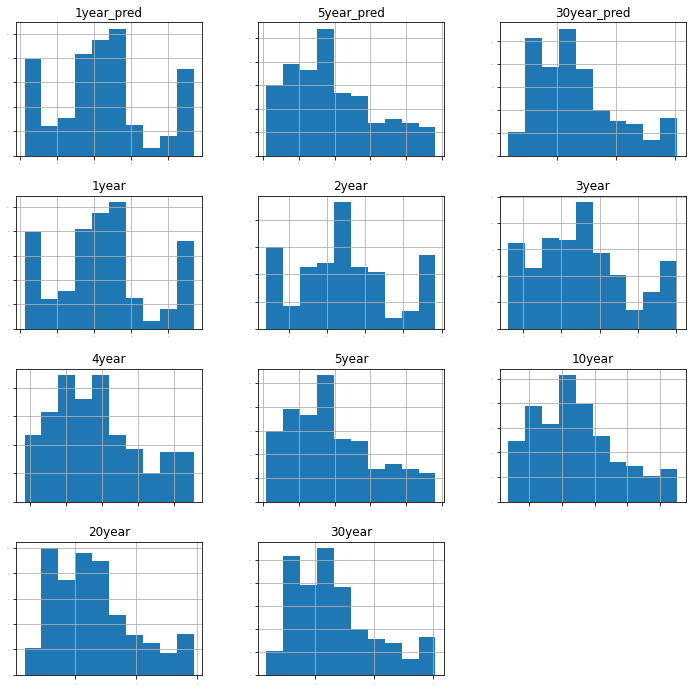

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

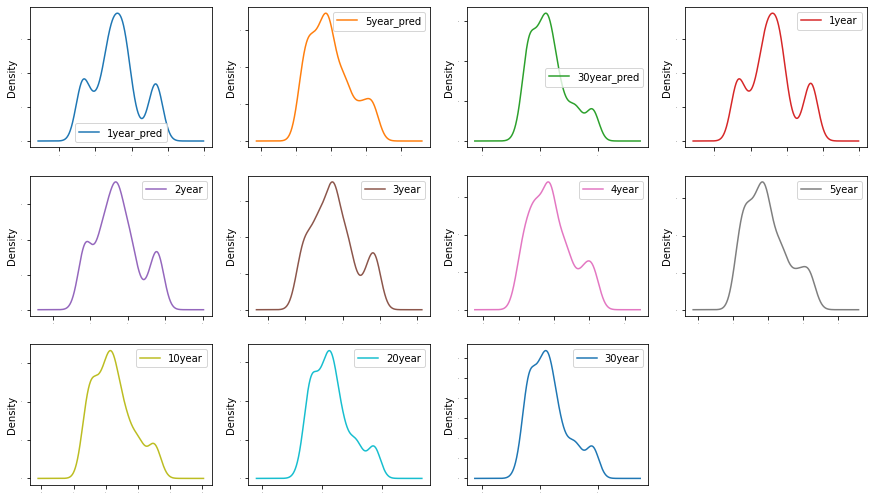

In [ ]:
# density
dataset.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

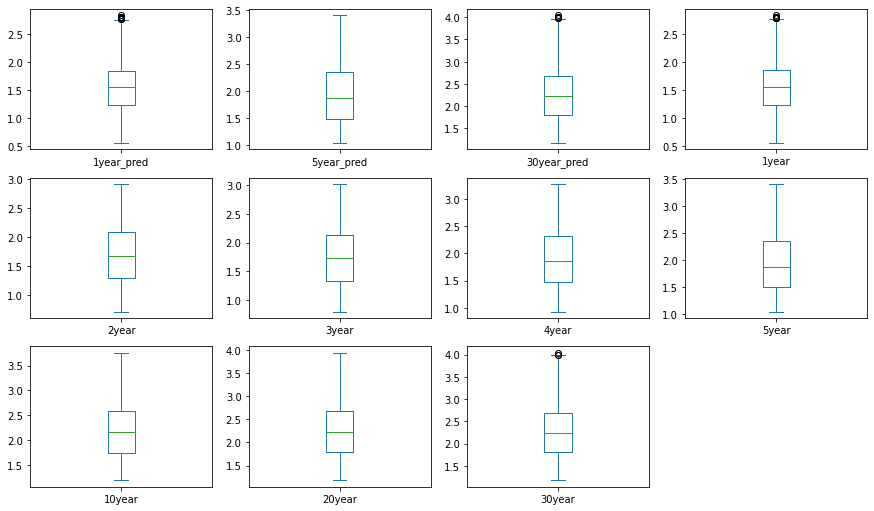

In [ ]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(15,15))
pyplot.show()

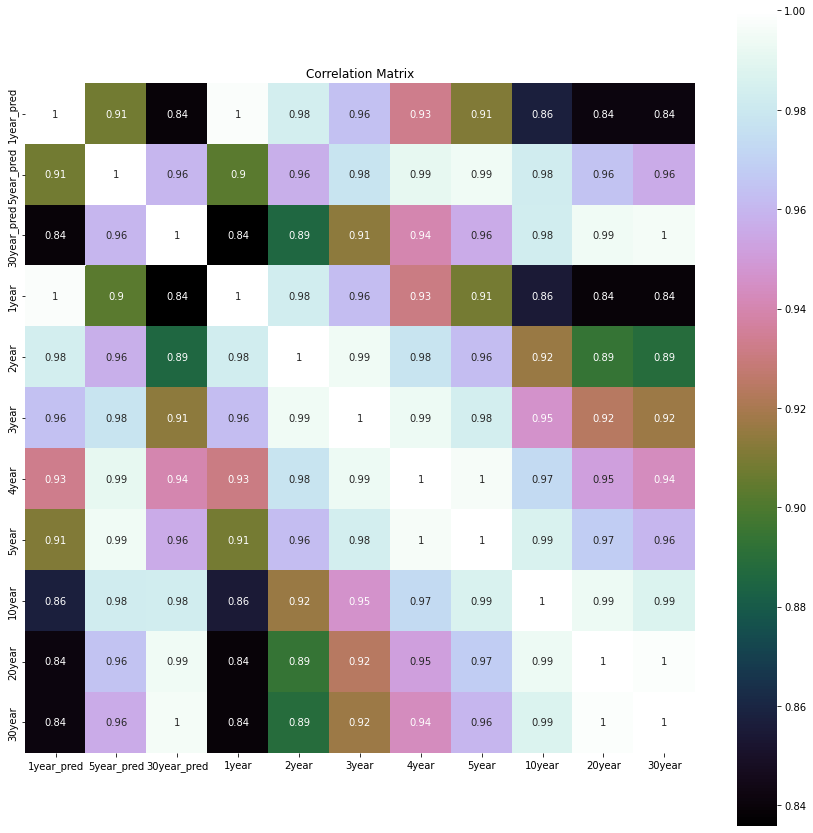

In [ ]:
# correlation
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

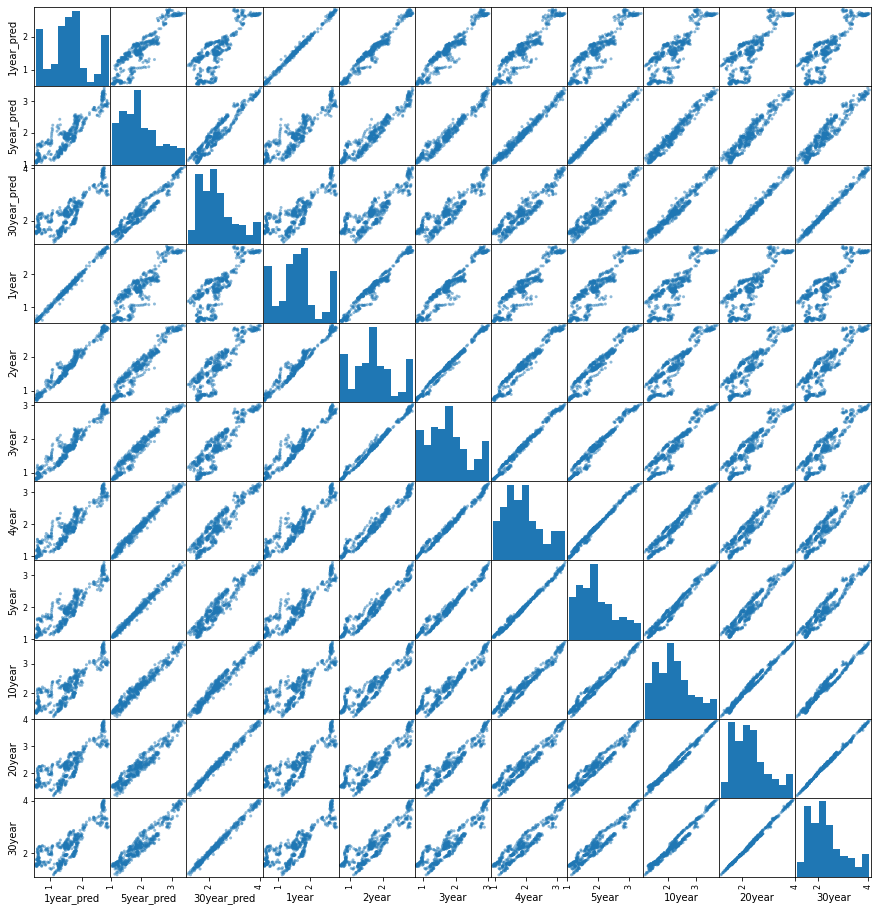

In [ ]:
# Scatterplot Matrix
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(15,16))
pyplot.show()

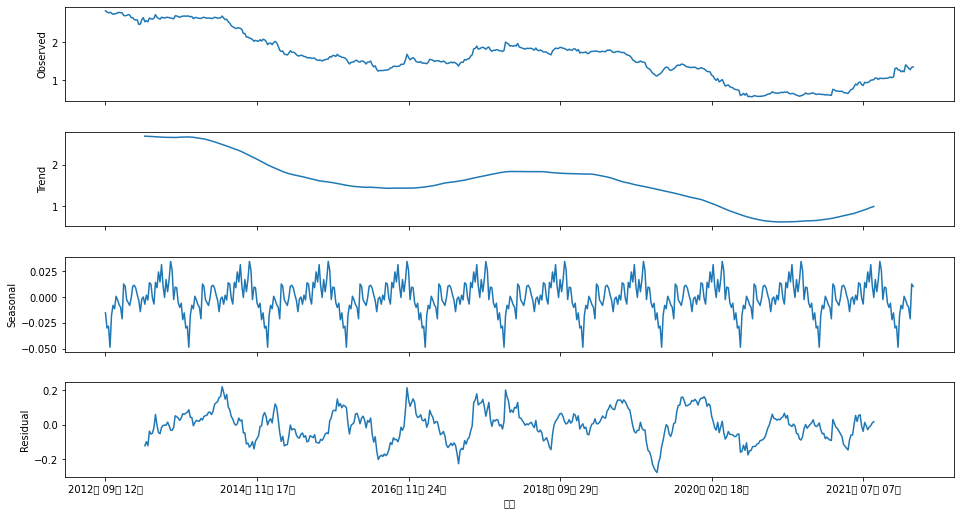

In [ ]:
temp_Y = dataset['1year_pred']
res = sm.tsa.seasonal_decompose(temp_Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

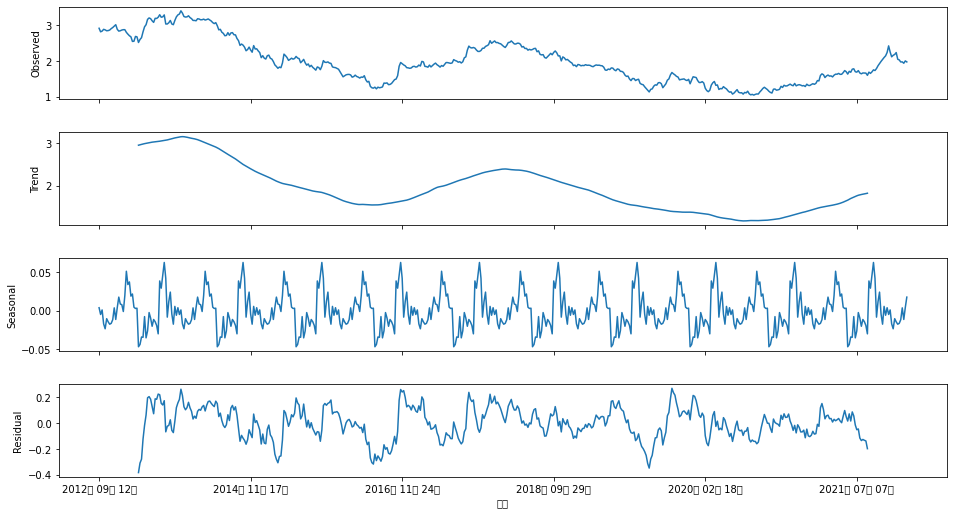

In [ ]:
temp_Y = dataset['5year_pred']
res = sm.tsa.seasonal_decompose(temp_Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

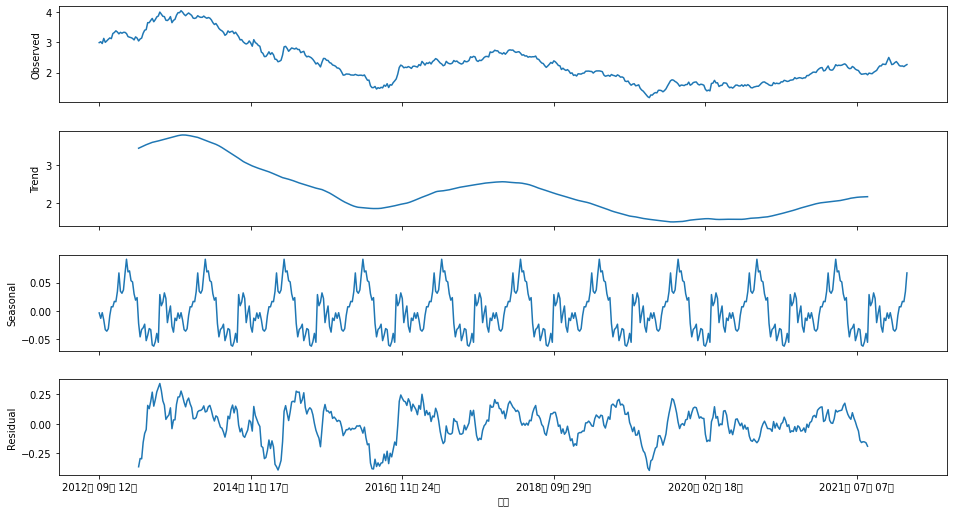

In [ ]:
temp_Y = dataset['30year_pred']
res = sm.tsa.seasonal_decompose(temp_Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [ ]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
for col in Y.columns:
    temp_Y = dataset[col]
    temp_X = dataset.loc[:, X.columns]
    fit = bestfeatures.fit(temp_X,temp_Y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(col)
    print(featureScores.nlargest(10,'Score'))  #print 10 best features
    print('--------------')

1year_pred
    Specs       Score
0   1year  127988.649
1   2year   15961.553
2   3year    6961.867
3   4year    3590.773
4   5year    2600.582
5  10year    1479.407
6  20year    1287.544
7  30year    1286.673
--------------
5year_pred
    Specs      Score
4   5year  50878.548
3   4year  31251.504
5  10year  14543.289
2   3year  11790.620
6  20year   7030.909
1   2year   5809.969
7  30year   5631.202
0   1year   2340.180
--------------
30year_pred
    Specs      Score
7  30year  62916.852
6  20year  48126.105
5  10year  15198.061
4   5year   5704.558
3   4year   4056.195
2   3year   2690.614
1   2year   1937.841
0   1year   1233.930
--------------


In [ ]:
# split out validation dataset for the end

validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'

In [ ]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#Neural Network
models.append(('MLP', MLPRegressor()))

In [ ]:
kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

LR: 
Average CV error: 0.003078745108892166 
Std CV Error: (0.0005383235939071959) 
Training Error:
1year_pred     0.002
5year_pred     0.004
30year_pred    0.004
dtype: float64 
Test Error:
1year_pred     0.001
5year_pred     0.004
30year_pred    0.005
dtype: float64
----------
LASSO: 
Average CV error: 0.4067767350969212 
Std CV Error: (0.020144024990937044) 
Training Error:
1year_pred     0.388
5year_pred     0.359
30year_pred    0.470
dtype: float64 
Test Error:
1year_pred     0.403
5year_pred     0.340
30year_pred    0.441
dtype: float64
----------
EN: 
Average CV error: 0.4067767350969212 
Std CV Error: (0.020144024990937044) 
Training Error:
1year_pred     0.388
5year_pred     0.359
30year_pred    0.470
dtype: float64 
Test Error:
1year_pred     0.403
5year_pred     0.340
30year_pred    0.441
dtype: float64
----------
KNN: 
Average CV error: 0.0040486794750830574 
Std CV Error: (0.0009726231165988531) 
Training Error:
1year_pred     0.001
5year_pred     0.003
30year_pred    0.00

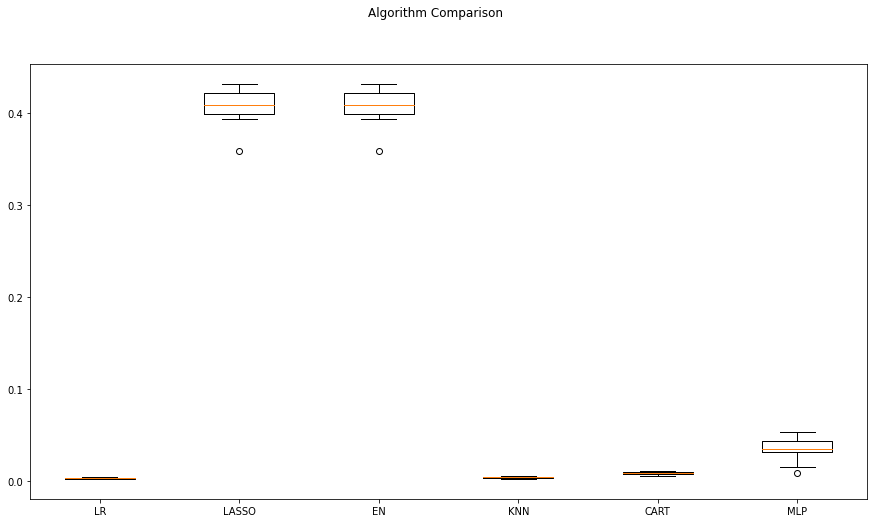

In [ ]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

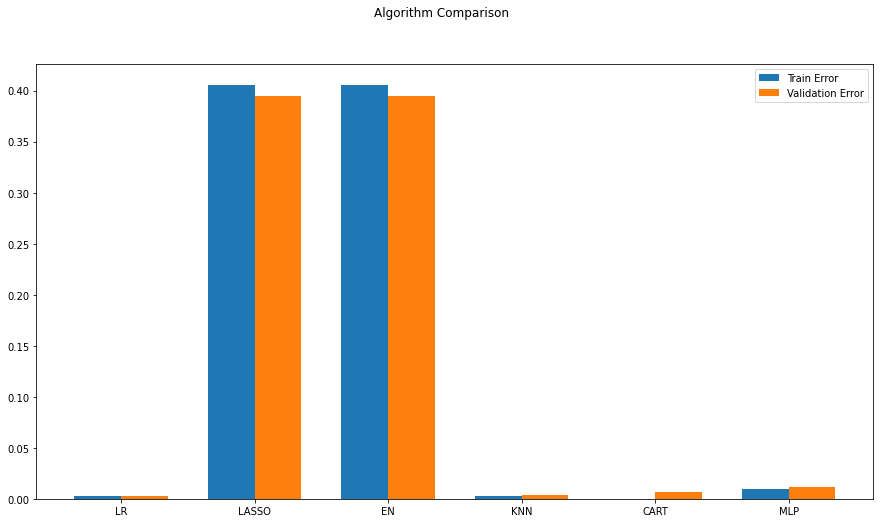

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
pyplot.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# 7. Grid search : MLPRegressor 
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.021821 using {'hidden_layer_sizes': (20, 30, 20)}
-0.032167 (0.010207) with: {'hidden_layer_sizes': (20,)}
-0.033688 (0.017705) with: {'hidden_layer_sizes': (50,)}
-0.027435 (0.013984) with: {'hidden_layer_sizes': (20, 20)}
-0.021821 (0.011279) with: {'hidden_layer_sizes': (20, 30, 20)}


In [ ]:
# prepare model
model = MLPRegressor(hidden_layer_sizes= (20, 30, 20))
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(20, 30, 20))

In [ ]:
# estimate accuracy on validation set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model.predict(X_validation)
mse_MLP = mean_squared_error(Y_validation, predictions)
r2_MLP = r2_score(Y_validation, predictions)

# prepare model
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)
predictions_2 = model_2.predict(X_validation)

mse_OLS = mean_squared_error(Y_validation, predictions_2)
r2_OLS = r2_score(Y_validation, predictions_2)
print("MSE Regression = %f, MSE MLP = %f" % (mse_OLS, mse_MLP ))
print("R2 Regression = %f, R2 MLP = %f" % (r2_OLS, r2_MLP ))


MSE Regression = 0.003231, MSE MLP = 0.008814
R2 Regression = 0.991678, R2 MLP = 0.976923


In [ ]:
train_size = int(len(X) * (1-validation_size))
X_train, X_validation = X[0:train_size], X[train_size:len(X)]
Y_train, Y_validation = Y[0:train_size], Y[train_size:len(X)]

modelMLP = MLPRegressor(hidden_layer_sizes= (50,))
modelOLS = LinearRegression()
model_MLP = modelMLP.fit(X_train, Y_train)
model_OLS = modelOLS.fit(X_train, Y_train)

Y_predMLP = pd.DataFrame(model_MLP.predict(X_validation), index=Y_validation.index,
                      columns=Y_validation.columns)

Y_predOLS = pd.DataFrame(model_OLS.predict(X_validation), index=Y_validation.index,
                      columns=Y_validation.columns)

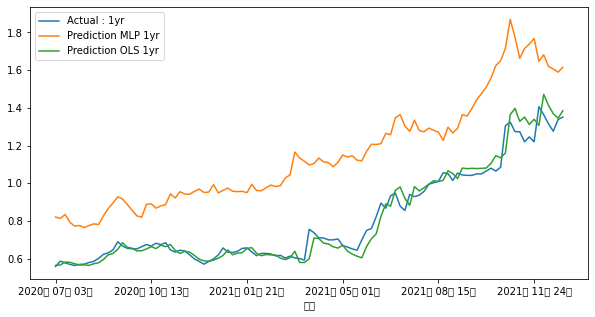

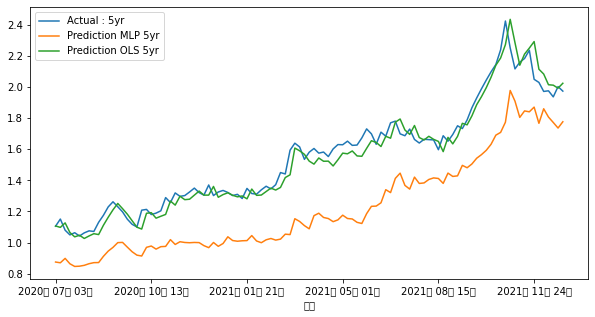

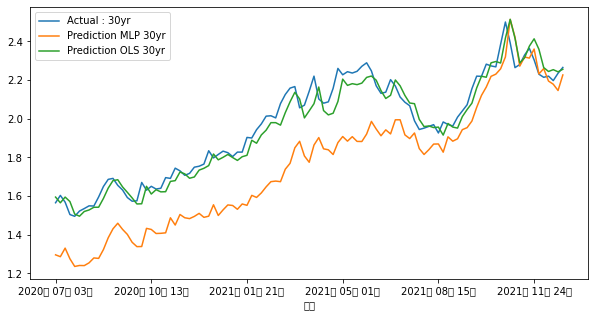

In [ ]:
pd.DataFrame({'Actual : 1yr': Y_validation.loc[:, '1year_pred'],
              'Prediction MLP 1yr': Y_predMLP.loc[:, '1year_pred'],
              'Prediction OLS 1yr': Y_predOLS.loc[:, '1year_pred']}).plot(figsize=(10,5))

pd.DataFrame({'Actual : 5yr': Y_validation.loc[:, '5year_pred'],
              'Prediction MLP 5yr': Y_predMLP.loc[:, '5year_pred'],
              'Prediction OLS 5yr': Y_predOLS.loc[:, '5year_pred']}).plot(figsize=(10,5))

pd.DataFrame({'Actual : 30yr': Y_validation.loc[:, '30year_pred'],
              'Prediction MLP 30yr': Y_predMLP.loc[:, '30year_pred'],
              'Prediction OLS 30yr': Y_predOLS.loc[:, '30year_pred']}).plot(figsize=(10,5))